## Arboles de decisiones

CINDY PATRICIA URECHE LOPEZ

Curso Analisis de Datos 

Grupo: 202016908_91

In [10]:
#Importamos Las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
#Cargamos el dataset
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Dimensiones del dataset
data.shape

(1599, 12)

In [16]:
# Calcula las estadísticas descriptivas
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [18]:
# Verificación de valores nulos
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

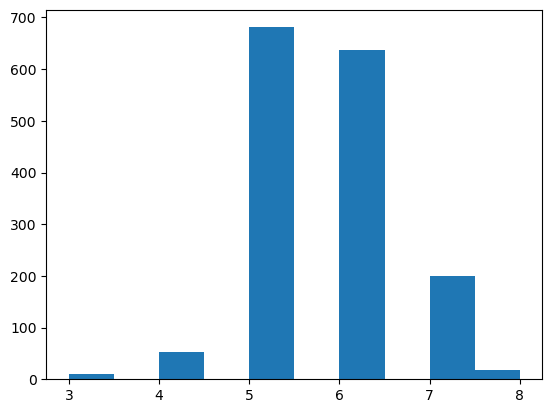

In [22]:
plt.hist(data.quality)

<Axes: xlabel='alcohol', ylabel='pH'>

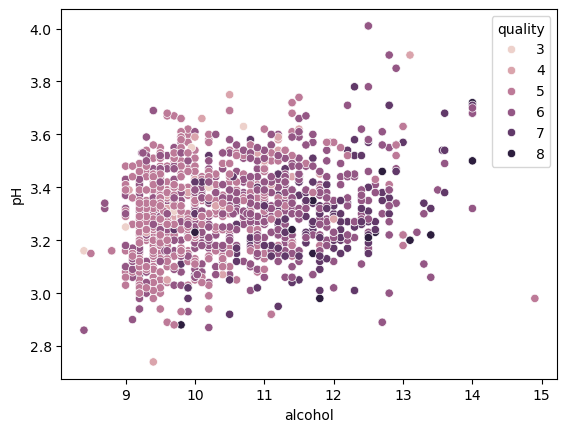

In [32]:
# Distribución de la Variable
sns.scatterplot(x="alcohol", y="pH", hue="quality", data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

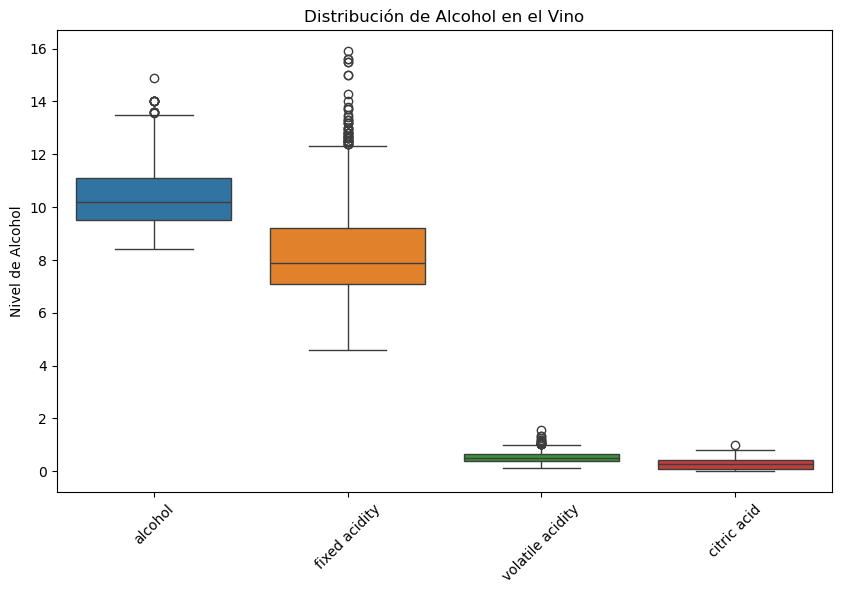

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['alcohol','fixed acidity','volatile acidity','citric acid']])
plt.xticks(rotation=45)
plt.title('Distribución de Alcohol en el Vino')
plt.ylabel('Nivel de Alcohol')
plt.show

In [44]:
predictors_col = ["alcohol","fixed acidity","volatile acidity", "citric acid"]
target_col = ['quality']              

In [46]:
predictors = data[predictors_col]
target = data[target_col]

In [48]:
predictors

,alcohol,fixed acidity,volatile acidity,citric acid
0,9.4,7.4,0.700,0.00
1,9.8,7.8,0.880,0.00
2,9.8,7.8,0.760,0.04
3,9.8,11.2,0.280,0.56
4,9.4,7.4,0.700,0.00
...,...,...,...,...
1594,10.5,6.2,0.600,0.08
1595,11.2,5.9,0.550,0.10
1596,11.0,6.3,0.510,0.13
1597,10.2,5.9,0.645,0.12


In [50]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [52]:
corr = predictors.corr()
corr

,alcohol,fixed acidity,volatile acidity,citric acid
alcohol,1.000000,-0.061668,-0.202288,0.109903
fixed acidity,-0.061668,1.000000,-0.256131,0.671703
volatile acidity,-0.202288,-0.256131,1.000000,-0.552496
citric acid,0.109903,0.671703,-0.552496,1.000000


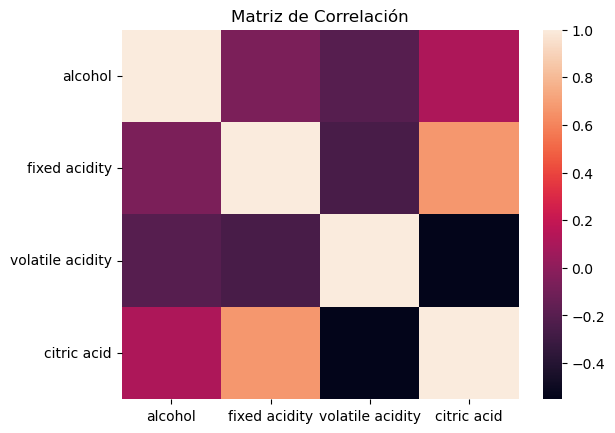

In [54]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

Arbol de decisión

In [58]:
tree = DecisionTreeClassifier()

In [60]:
arbol = tree.fit(X_train, y_train)

[Text(0.5544007685891325, 0.975, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.28739672704162694, 0.925, 'x[2] <= 0.548\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.4208987478153797, 0.95, 'True  '),
 Text(0.10939982523037814, 0.875, 'x[2] <= 0.317\ngini = 0.573\nsamples = 364\nvalue = [1, 8, 172, 163, 20, 0]'),
 Text(0.027963139497934542, 0.825, 'x[1] <= 14.65\ngini = 0.505\nsamples = 54\nvalue = [0, 1, 9, 36, 8, 0]'),
 Text(0.02542103590721322, 0.775, 'x[3] <= 0.225\ngini = 0.477\nsamples = 52\nvalue = [0, 1, 9, 36, 6, 0]'),
 Text(0.020336828725770577, 0.725, 'x[1] <= 6.15\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 1, 0]'),
 Text(0.017794725135049254, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.022878932316491896, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.030505243088655862, 0.725, 'x[1] <= 8.35\ngini = 0.446\nsamples = 50\nvalue = [0, 1,

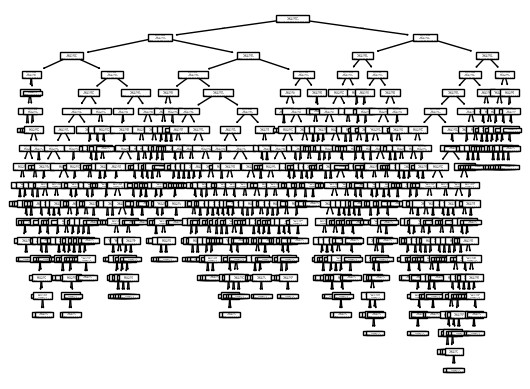

In [62]:
plot_tree(arbol)

In [64]:
predicciones = arbol.predict(X_test)

In [66]:
predicciones

array([6, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 7, 5, 5, 6, 6,
       7, 5, 6, 8, 6, 6, 5, 4, 6, 5, 7, 5, 5, 6, 6, 5, 5, 6, 5, 6, 7, 7,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 4, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 7, 7, 8, 6, 6, 6, 6, 5, 7, 5, 5, 5, 6, 6, 5, 5, 5, 7,
       6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 5, 4, 5, 6, 6, 6, 5, 5, 6, 7, 6, 6,
       5, 7, 6, 5, 7, 5, 6, 4, 5, 6, 4, 6, 7, 6, 4, 6, 5, 5, 5, 8, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 7, 5, 7, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 7, 4, 6, 5, 5, 6, 6, 5, 5, 7, 6, 7,
       5, 5, 6, 5, 7, 6, 5, 5, 3, 5, 6, 4, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 4, 7, 5, 5, 5, 6, 7, 5,
       5, 5, 6, 7, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 7, 4,
       6, 7, 6, 5, 6, 6, 5, 4, 5, 5, 6, 5, 5, 6, 6,

In [68]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,1,2,1,4,0,0
5,0,9,103,26,8,0
6,0,3,38,73,8,2
7,0,0,5,14,14,2
8,0,0,1,3,2,0


In [70]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6

In [72]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6025464530401086

In [74]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [76]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.60072085878295

8. Interpretar, analizar y documentar los resultados obtenidos.

La mayoría de los vinos tienen una calificación entre 5 y 6, lo que indica una calidad media-baja.
Menos vinos tienen calificaciones extremas (muy altas o muy bajas).

A medida que aumenta el contenido de alcohol, el pH tiende a disminuir ligeramente.
Los vinos de mayor calidad tienden a estar en el rango de mayor alcohol y menor pH, 
sugiriendo que el contenido de alcohol puede estar correlacionado con una mejor calidad.

Las variables tienen diferentes rangos de distribución.
volatile acidity muestra algunos valores atípicos, 
lo que indica la presencia de vinos con niveles inusualmente altos de acidez volátil.

La matriz de confusión es útil para identificar en qué clases el modelo comete más errores. 
Cada celda muestra el número de casos predichos para una clase específica en relación con la clase verdadera.

La Curva ROC permite observar el comportamiento del modelo en la relación entre la Tasa de Verdaderos Positivos (TPR) 
y la Tasa de Falsos Positivos (FPR). Un AUC (Área Bajo la Curva) alto indica un buen balance.

